# Classification of diabetic retinopathy using transfer learning on pre-trained inceptionV3 model

The below code will be used for increasing the memory size of colab


In [0]:
a = []
while(1):
    a.append('1')

Code for connecting Colab to Google Drive

In [0]:
  from google.colab import drive
  drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Explenation of model with an image

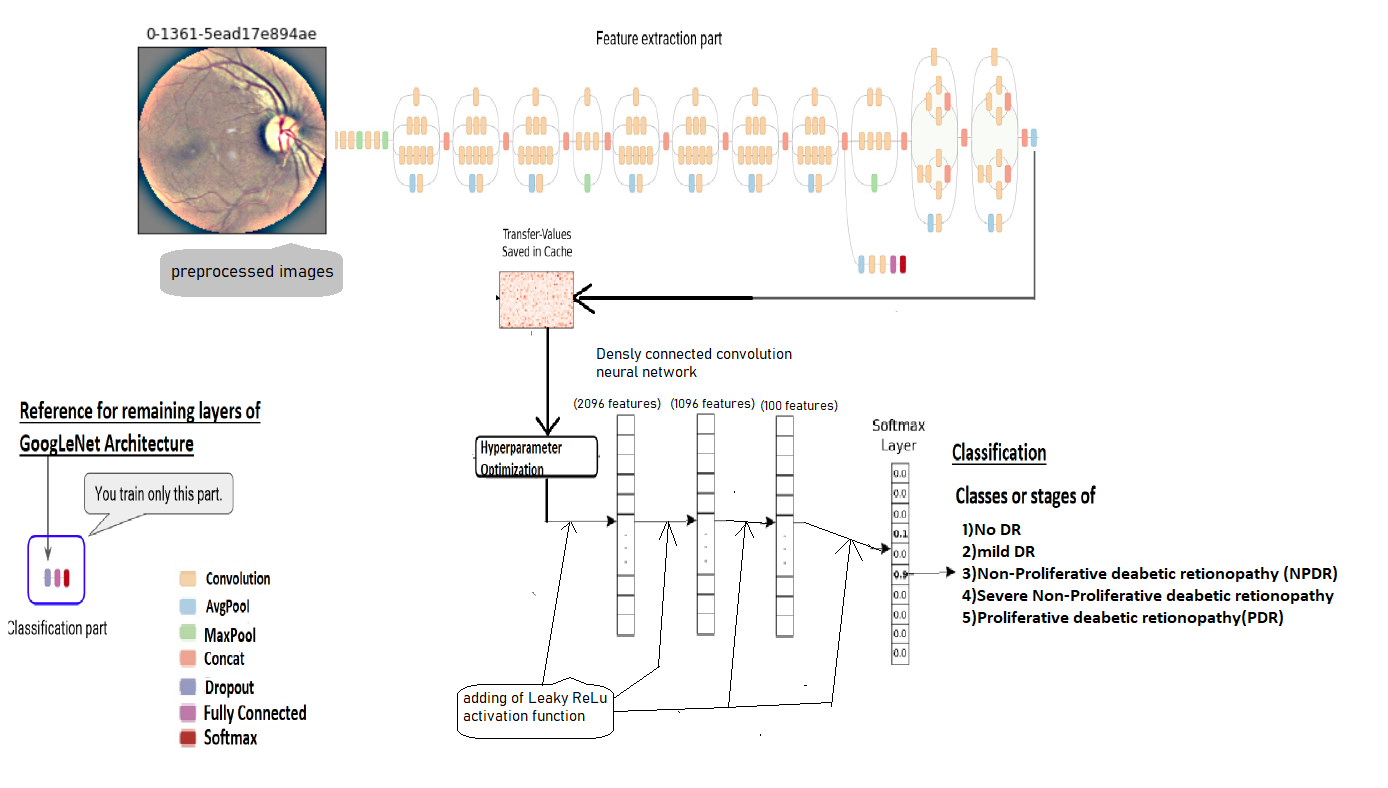

In [0]:
from IPython.display import Image, display
Image('drive/My Drive/model.png')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Importing of essential libraryes 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
from skimage.transform import resize
from imgaug import augmenters as iaa
from tqdm import tqdm
import PIL
from PIL import Image, ImageOps
import cv2
from sklearn.utils import class_weight, shuffle
from keras.losses import binary_crossentropy
from keras.applications.resnet50 import preprocess_input
import keras.backend as K
import tensorflow as tf
from sklearn.metrics import f1_score, fbeta_score
from keras.utils import Sequence
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import time
from datetime import timedelta
import os
from fastai import *
from fastai.vision import *
import matplotlib.pyplot as plt
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
WORKERS = 2
CHANNEL = 3

import warnings
warnings.filterwarnings("ignore")
IMG_SIZE = 512
NUM_CLASSES = 5
SEED = 77
TRAIN_NUM = 1000

Using TensorFlow backend.


In [0]:
import gc
import cv2
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

##############################################################

import xgboost as xgb
import sklearn.ensemble as ensem
from keras.preprocessing.image import ImageDataGenerator

###############################################################

import sklearn.metrics as metrics
from sklearn.utils import shuffle
##############################################################


from keras.models import Model
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import GRU
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import Flatten
from keras.layers import Dropout
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.utils import to_categorical
from keras.layers import ZeroPadding2D
from keras.layers.merge import concatenate
from keras.utils import to_categorical
from keras import optimizers
from keras.applications import VGG16, ResNet50,Xception, InceptionResNetV2
from keras.applications import VGG19, InceptionV3,MobileNet
from keras.preprocessing.image import ImageDataGenerator
import keras.optimizers as optim

Mapping of CSV data from drive to a variable in colab.
spliting of id_code and diagnosis for further processing

In [0]:
df_train = pd.read_csv("drive/My Drive/train.csv")
df_test = pd.read_csv("drive/My Drive/test.csv")

x = df_train['id_code']
y = df_train['diagnosis']

x, y = shuffle(x, y, random_state=SEED)

# pre-processing

**Maping of original image names to rows of CSV file ***

Original input of images from google drive, the mapping of image name with the name in the CSV file and then supperating the files accordingto the category of DR.


CPU times: user 3.53 s, sys: 103 ms, total: 3.63 s
Wall time: 19.8 s


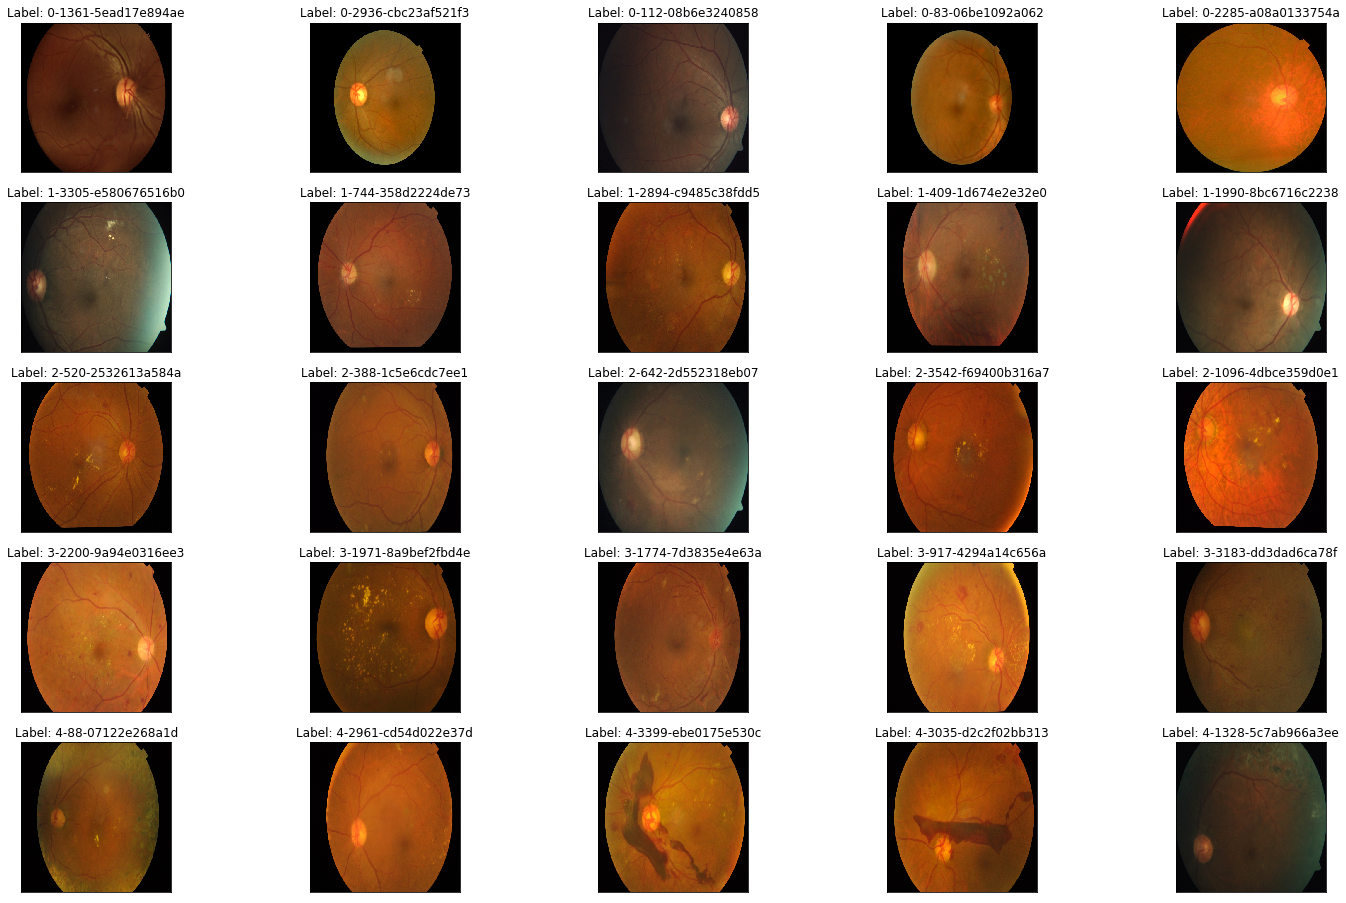

In [0]:
%%time
fig = plt.figure(figsize=(25, 16))
# display 10 images from each category
for class_id in sorted(train_y.unique()):
    for i, (idx, row) in enumerate(df_train.loc[df_train['diagnosis'] == class_id].sample(5, random_state=SEED).iterrows()):
        ax = fig.add_subplot(5, 5, class_id * 5 + i + 1, xticks=[], yticks=[])
        path=f"drive/My Drive/train_images/{row['id_code']}.png"
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))

        plt.imshow(image)
        ax.set_title('Label: %d-%d-%s' % (class_id, idx, row['id_code']) )
        

Lets analyse the output of the code which categorises the images according to the stages of DR. In the above output each row depicts each category of DR. 

Grey scale is tried for this data for understanding of some pictures more better. for an instance if we take image(4,4), the hamerhedghes cannot be seen perfectly.

CPU times: user 3.23 s, sys: 79 ms, total: 3.31 s
Wall time: 3.27 s


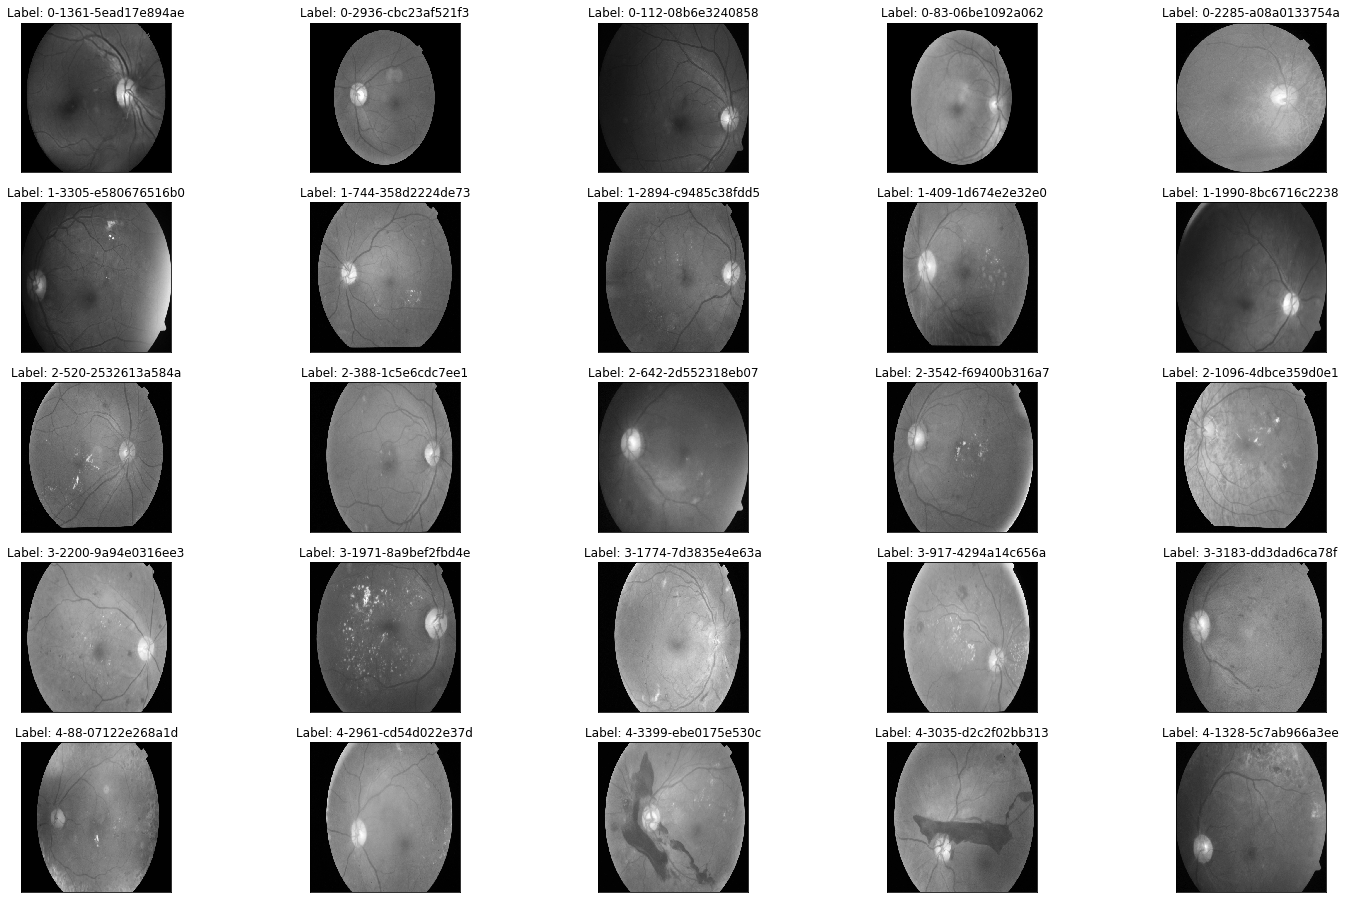

In [0]:
%%time
fig = plt.figure(figsize=(25, 16))
for class_id in sorted(train_y.unique()):
    for i, (idx, row) in enumerate(df_train.loc[df_train['diagnosis'] == class_id].sample(5, random_state=SEED).iterrows()):
        ax = fig.add_subplot(5, 5, class_id * 5 + i + 1, xticks=[], yticks=[])
        path=f"drive/My Drive/train_images/{row['id_code']}.png"
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))

        plt.imshow(image, cmap='gray')
        ax.set_title('Label: %d-%d-%s' % (class_id, idx, row['id_code']) )

if we observe the above output for the grey scale, in some images cotton wool spots and hard exudates cannot be differentiated perfectly. If we take image (4,1) as an example the differences between them are subtil. The original size of the image is shown in below image. 

2136 3216


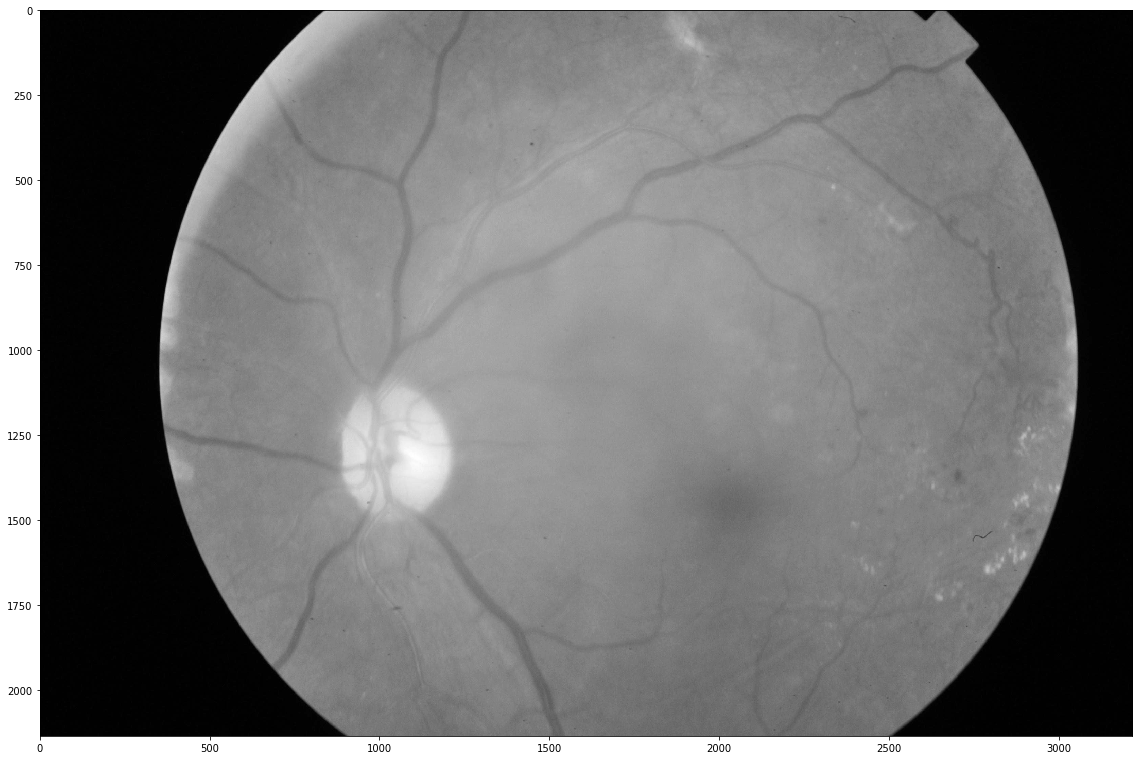

In [0]:
dpi = 80 #inch

path=f"drive/My Drive/train_images/cd54d022e37d.png" # lower-right, this still looks not so severe, can be class3
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
height, width = image.shape
print(height, width)

SCALE=2
figsize = (width / float(dpi))/SCALE, (height / float(dpi))/SCALE

fig = plt.figure(figsize=figsize)
plt.imshow(image, cmap='gray')

An attempt to solve this issue is to gaussian blurr of the images. This will reduce the sigma value of the grey scale, but this havint solved the issue of differentiation.

CPU times: user 15.5 s, sys: 118 ms, total: 15.6 s
Wall time: 9.54 s


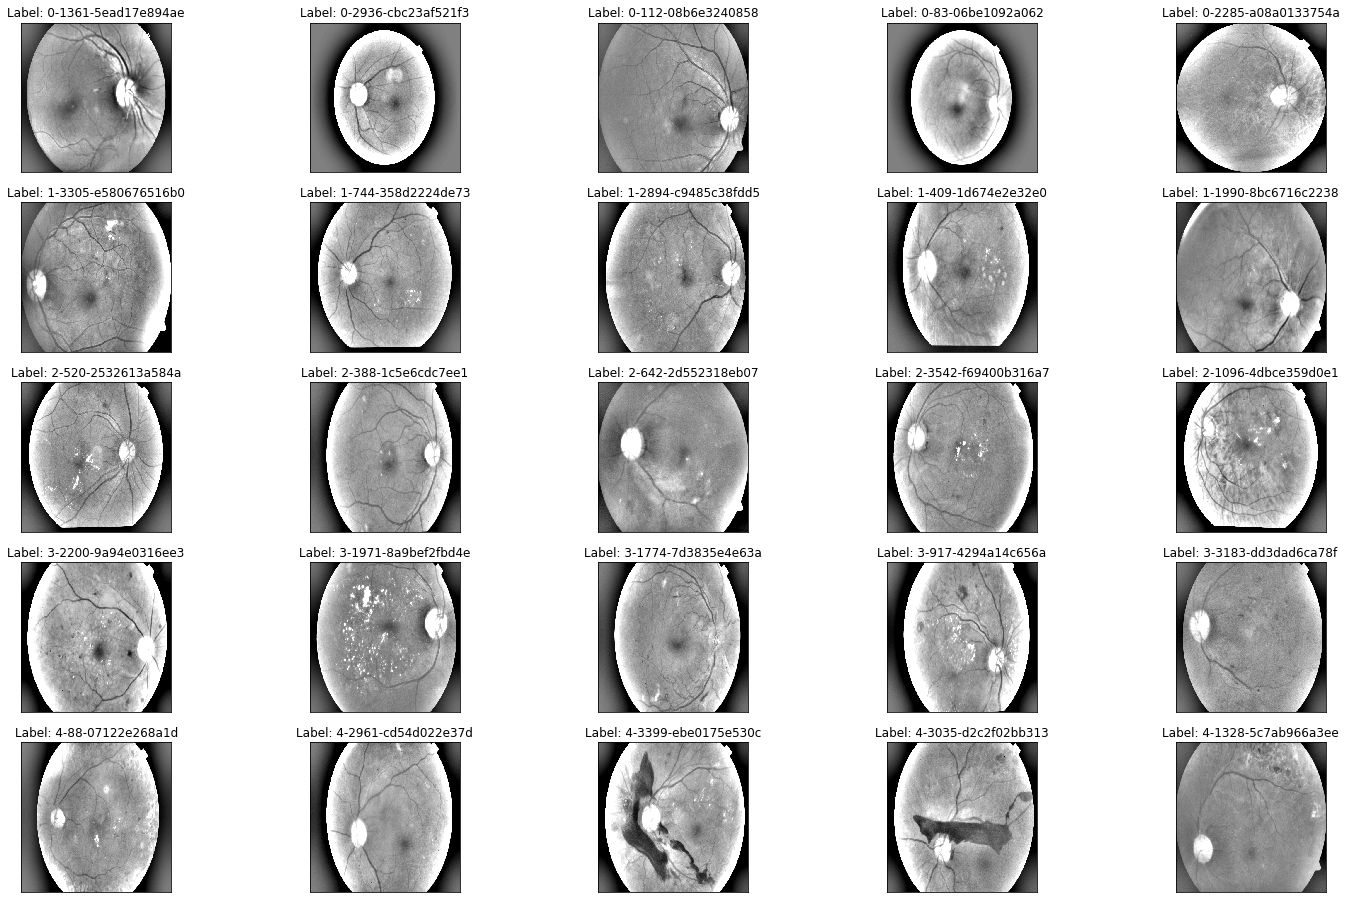

In [0]:
%%time
fig = plt.figure(figsize=(25, 16))
for class_id in sorted(train_y.unique()):
    for i, (idx, row) in enumerate(df_train.loc[df_train['diagnosis'] == class_id].sample(5, random_state=SEED).iterrows()):
        ax = fig.add_subplot(5, 5, class_id * 5 + i + 1, xticks=[], yticks=[])
        path=f"drive/My Drive/train_images/{row['id_code']}.png"
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , IMG_SIZE/10) ,-4 ,128) 

        plt.imshow(image, cmap='gray')
        ax.set_title('Label: %d-%d-%s' % (class_id, idx, row['id_code']) )

when we observe the above images the edges are completly plan and this may lead to loos of information at edges.

**To solve the issue of subtil differences and data at edges, Ben Graham's preprocessing method is followed based on the literature review.**

The below code is a helper functionfor croping the images which is used in the further bengrahms pre-processing. 

In [0]:
def crop_image1(img,tol=7):
    # img is image data
    # tol  is tolerance
        
    mask = img>tol
    return img[np.ix_(mask.any(1),mask.any(0))]

def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img

Helper function for ben grahms pre-process

In [0]:
def load_ben_color(path, sigmaX=10):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = crop_image_from_gray(image)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , sigmaX) ,-4 ,128)
        
    return image

Applying Ben grahms pre-procesing to the original data 

CPU times: user 19.1 s, sys: 239 ms, total: 19.3 s
Wall time: 21 s


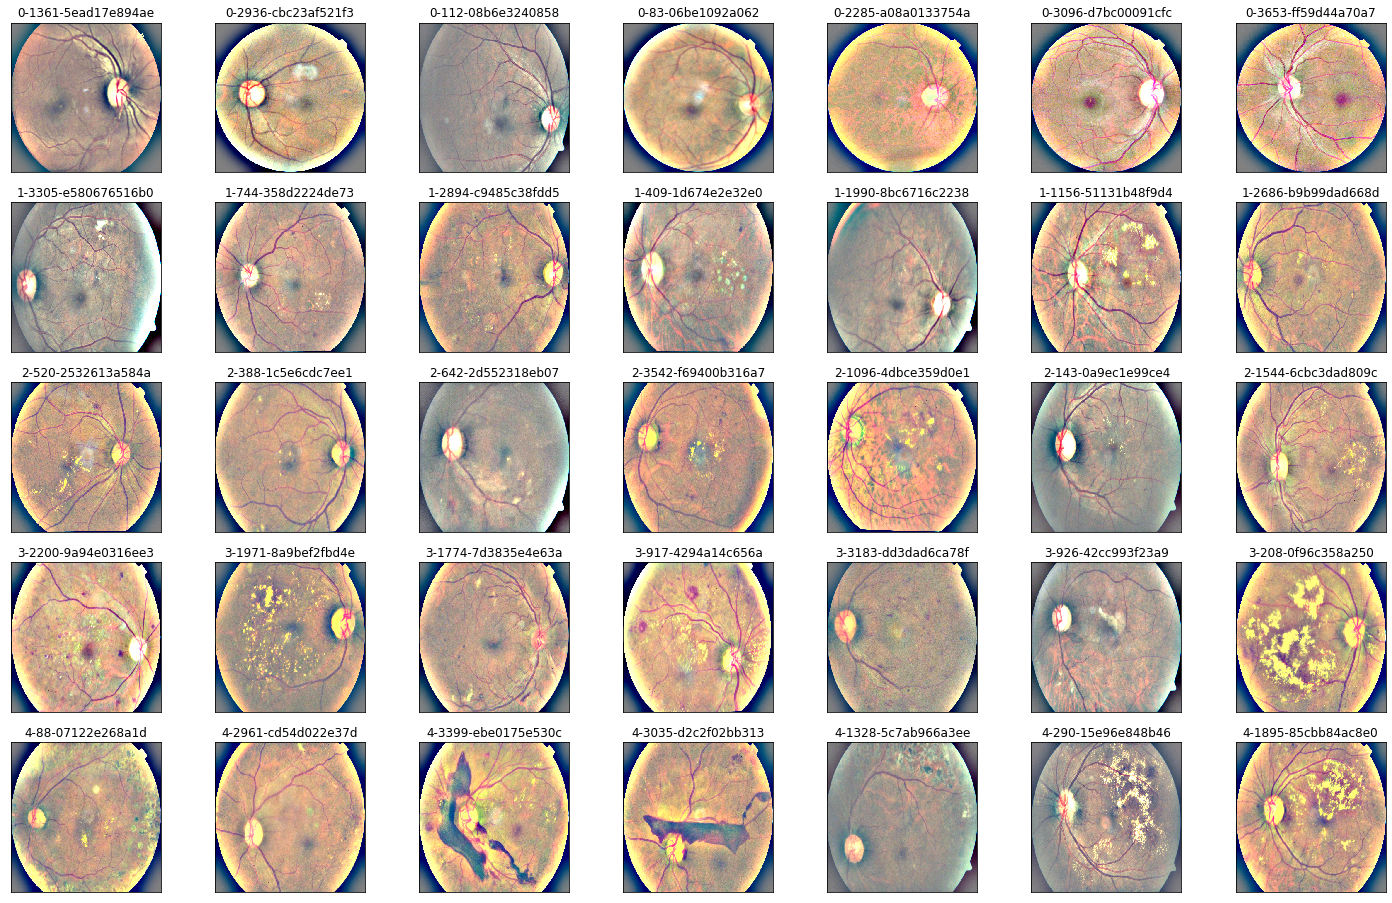

In [0]:
%%time

NUM_SAMP=7
fig = plt.figure(figsize=(25, 16))
for class_id in sorted(train_y.unique()):
    for i, (idx, row) in enumerate(df_train.loc[df_train['diagnosis'] == class_id].sample(NUM_SAMP, random_state=SEED).iterrows()):
        ax = fig.add_subplot(5, NUM_SAMP, class_id * NUM_SAMP + i + 1, xticks=[], yticks=[])
        path=f"drive/My Drive/train_images/{row['id_code']}.png"
        image = load_ben_color(path,sigmaX=30)

        plt.imshow(image)
        ax.set_title('%d-%d-%s' % (class_id, idx, row['id_code']) )

Helper function for circle crop to solve the issue of loosing of data. 

In [0]:
def circle_crop(img, sigmaX=10):   
    """
    Create circular crop around image centre    
    """    
    
    img = cv2.imread(img)
    img = crop_image_from_gray(img)    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    height, width, depth = img.shape    
    
    x = int(width/2)
    y = int(height/2)
    r = np.amin((x,y))
    
    circle_img = np.zeros((height, width), np.uint8)
    cv2.circle(circle_img, (x,y), int(r), 1, thickness=-1)
    img = cv2.bitwise_and(img, img, mask=circle_img)
    img = crop_image_from_gray(img)
    img=cv2.addWeighted ( img,4, cv2.GaussianBlur( img , (0,0) , sigmaX) ,-4 ,128)
    return img 

Applying original data to the circle color crop.

CPU times: user 1min 21s, sys: 423 ms, total: 1min 21s
Wall time: 47.9 s


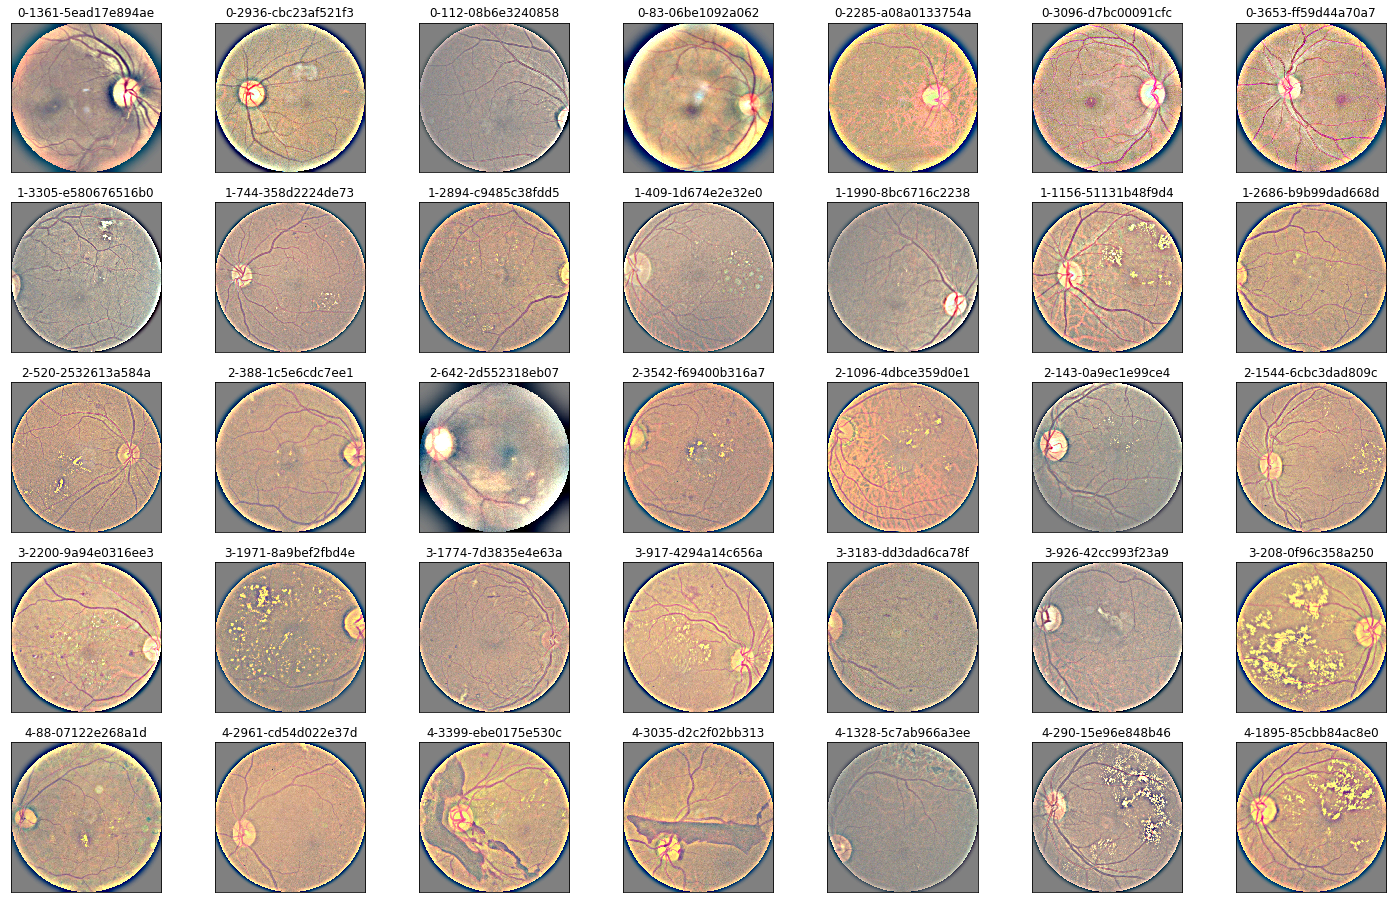

In [0]:
%%time
## try circle crop
NUM_SAMP=7
fig = plt.figure(figsize=(25, 16))
for class_id in sorted(train_y.unique()):
    for i, (idx, row) in enumerate(df_train.loc[df_train['diagnosis'] == class_id].sample(NUM_SAMP, random_state=SEED).iterrows()):
        ax = fig.add_subplot(5, NUM_SAMP, class_id * NUM_SAMP + i + 1, xticks=[], yticks=[])
        path=f"drive/My Drive/train_images/{row['id_code']}.png"
        image = circle_crop(path,sigmaX=30)

        plt.imshow(image)
        ax.set_title('%d-%d-%s' % (class_id, idx, row['id_code']) )

Class 0: 1805
Class 1: 370
Class 2: 999
Class 3: 193
Class 4: 295


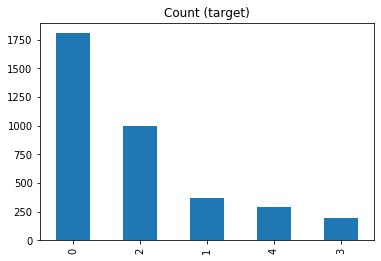

In [5]:
import numpy as np
import pandas as pd

df_train = pd.read_csv('drive/My Drive/train.csv')

target_count = df_train.diagnosis.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Class 2:', target_count[2])
print('Class 3:', target_count[3])
print('Class 4:', target_count[4])
#print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [0]:
# Class count
count_class_0, count_class_1,count_class_2, count_class_3, count_class_4 = df_train.diagnosis.value_counts()

# Divide by class
df_class_0 = df_train[df_train['diagnosis'] == 0]
df_class_1 = df_train[df_train['diagnosis'] == 1]
df_class_2 = df_train[df_train['diagnosis'] == 2]
df_class_3 = df_train[df_train['diagnosis'] == 3]
df_class_4 = df_train[df_train['diagnosis'] == 4]

Random over-sampling:
4    1805
3    1805
2    1805
1    1805
0    1805
Name: diagnosis, dtype: int64


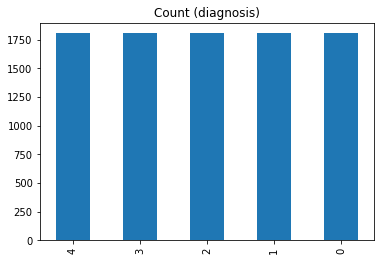

In [8]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_class_2_over = df_class_2.sample(count_class_0, replace=True)
df_class_3_over = df_class_3.sample(count_class_0, replace=True)
df_class_4_over = df_class_4.sample(count_class_0, replace=True)
df_train_over = pd.concat([df_class_0, df_class_1_over, df_class_2_over,df_class_3_over,df_class_4_over], axis=0)

print('Random over-sampling:')
print(df_train_over.diagnosis.value_counts())

df_train_over.diagnosis.value_counts().plot(kind='bar', title='Count (diagnosis)');

# Inception V3 Model implementation

In [0]:
colorcode = cv2.COLOR_BGR2RGB
interpolateVal = cv2.INTER_AREA
imgsize = 150
channle = 3

prepration test data to apply fot the model.

In [0]:
train = pd.read_csv('drive/My Drive/train.csv')

paths = train.id_code
curr = paths[0]
images = cv2.imread(f'drive/My Drive/train_images/{curr}.png')
images = cv2.cvtColor(images, colorcode)
images = cv2.resize(images,(imgsize,imgsize),
                    interpolation=interpolateVal)
images = images.reshape((1,imgsize,imgsize,channle))
paths = paths[1:]
for path in tqdm(paths) :
    img = cv2.imread(f'drive/My Drive/train_images/{path}.png')
    img = cv2.cvtColor(img, colorcode)
    img = cv2.resize(img,(imgsize,imgsize),
                     interpolation=interpolateVal)
    img = img.reshape((1,imgsize,imgsize,channle))
    images = np.vstack((images,img))
    
images = images/255

transfering CSV file data and image training data for further process.

In [0]:
trainx = images
trainy = train.diagnosis

prepration train data to apply fot the model.

In [0]:
test = pd.read_csv('drive/My Drive/submission.csv')
paths = test.id_code
curr = paths[0]
images = cv2.imread(f'drive/My Drive/test_images/{curr}.png')
images = cv2.cvtColor(images, colorcode)
images = cv2.resize(images,(imgsize,imgsize),
                    interpolation=interpolateVal)
images = images.reshape((1,imgsize,imgsize,channle))
paths = paths[1:]
for path in tqdm(paths) :
    img = cv2.imread(f'drive/My Drive/test_images/{path}.png')
    img = cv2.cvtColor(img, colorcode)
    img = cv2.resize(img,(imgsize,imgsize),
                     interpolation=interpolateVal)
    img = img.reshape((1,imgsize,imgsize,channle))
    images = np.vstack((images,img))
    
images = images/255

transfering CSV file data and image testing data for further process.

In [0]:
testx = images
testy = test.diagnosis

In [0]:
image_gen = ImageDataGenerator(rotation_range=10,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.01,
                               zoom_range=[0.9, 3],
                               horizontal_flip=True,
                               vertical_flip=False,
                               fill_mode='reflect',
                               data_format='channels_last'
                              )

Testing Data categorised and converting as an array format to aply pre-trained model weights.  

In [0]:
data0 = testx[testy ==0]
img0diag = np.repeat(0,data0.shape[0])


data1 = testx[testy ==1]
for imag in tqdm(data1) :
    it = image_gen.flow(imag.reshape((1,imgsize,imgsize,3)))
    for i in range(5) :
        data1 = np.append(data1,it.next().reshape((1,imgsize,imgsize,3)),axis=0)
img1diag = np.repeat(1,data1.shape[0])



data2 = testx[testy ==2]
for imag in tqdm(data2) :
    it = image_gen.flow(imag.reshape((1,imgsize,imgsize,3)))
    for i in range(1) :
        data2 = np.append(data2,it.next().reshape((1,
                                                   imgsize,imgsize,3)),
                          axis=0)
img2diag = np.repeat(2,data2.shape[0])


data3 = testx[testy ==3]
for imag in tqdm(data3) :
    it = image_gen.flow(imag.reshape((1,imgsize,imgsize,3)))
    for i in range(8) :
        data3 = np.append(data3,it.next().reshape((1,
                                                   imgsize,imgsize,3)),
                          axis=0)
img3diag = np.repeat(3,data3.shape[0])


data4 = testx[testy ==4]
for imag in tqdm(data4) :
    it = image_gen.flow(imag.reshape((1,imgsize,imgsize,3)))
    for i in range(5) :
        data4 = np.append(data4,it.next().reshape((1,
                                                   imgsize,imgsize,3)),
                          axis=0)
img4diag = np.repeat(4,data4.shape[0])


testx = np.append(data0,data1,axis=0)
testx = np.append(testx,data2,axis=0)
testx = np.append(testx,data3,axis=0)
testx = np.append(testx,data4,axis=0)

testy = np.append(img0diag,img1diag,axis=0)
testy = np.append(testy,img2diag,axis=0)
testy = np.append(testy,img3diag,axis=0)
testy = np.append(testy,img4diag,axis=0)

Training Data categorised and converting as an array format to aply pre-trained model weights.  

In [0]:
data0 = trainx[trainy ==0]
img0diag = np.repeat(0,data0.shape[0])


data1 = trainx[trainy ==1]
for imag in tqdm(data1) :
    it = image_gen.flow(imag.reshape((1,imgsize,imgsize,3)))
    for i in range(5) :
        data1 = np.append(data1,it.next().reshape((1,imgsize,imgsize,3)),axis=0)
img1diag = np.repeat(1,data1.shape[0])



data2 = trainx[trainy ==2]
for imag in tqdm(data2) :
    it = image_gen.flow(imag.reshape((1,imgsize,imgsize,3)))
    for i in range(1) :
        data2 = np.append(data2,it.next().reshape((1,
                                                   imgsize,imgsize,3)),
                          axis=0)
img2diag = np.repeat(2,data2.shape[0])


data3 = trainx[trainy ==3]
for imag in tqdm(data3) :
    it = image_gen.flow(imag.reshape((1,imgsize,imgsize,3)))
    for i in range(8) :
        data3 = np.append(data3,it.next().reshape((1,
                                                   imgsize,imgsize,3)),
                          axis=0)
img3diag = np.repeat(3,data3.shape[0])


data4 = trainx[trainy ==4]
for imag in tqdm(data4) :
    it = image_gen.flow(imag.reshape((1,imgsize,imgsize,3)))
    for i in range(5) :
        data4 = np.append(data4,it.next().reshape((1,
                                                   imgsize,imgsize,3)),
                          axis=0)
img4diag = np.repeat(4,data4.shape[0])


trainx = np.append(data0,data1,axis=0)
trainx = np.append(trainx,data2,axis=0)
trainx = np.append(trainx,data3,axis=0)
trainx = np.append(trainx,data4,axis=0)

trainy = np.append(img0diag,img1diag,axis=0)
trainy = np.append(trainy,img2diag,axis=0)
trainy = np.append(trainy,img3diag,axis=0)
trainy = np.append(trainy,img4diag,axis=0)

Downloded pre-traned weights from https://www.kaggle.com/thophan/keraspretrainedmodel is downloded and stored in google drive.
this file again draged to python environment for further process


in this function include_top=False denots that the model will not consists of its final layers as shown in the procedure of implementation




In [0]:
pathk='drive/My Drive/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
modeli = InceptionV3(include_top=False,
                           weights=pathk,
                           input_tensor=None,
                           input_shape=(imgsize,imgsize, 3)
                          )

Modified CNN with conv2d_86, conv2d_94, batch_normalization_94 layers.

In [0]:
modeli.trainable = True
setTrainable = False
for layer in modeli.layers:
    if layer.name in ['conv2d_86','conv2d_94','batch_normalization_94']:
        setTrainable = True
    if setTrainable:
        layer.trainable = True
        setTrainable = False
    else:
        layer.trainable = False

Adding of each layer with an activation function. finally the results are classified using a soft max layer. 

In [0]:
from keras.layers import LeakyReLU

model = Sequential()
model.add(modeli)
model.add(Flatten())
model.add(Dense(2096))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(1096))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(100, activation='relu'))
model.add(Dense(5, activation='softmax'))

the results are optained are in array format. To apply for the model they should be in categorical format. the below code will convert the data to categorical format 

In [0]:
trainy = to_categorical(trainy , 
                        num_classes=None, 
                        dtype='float32')

In [0]:
testy = to_categorical(testy , 
                        num_classes=None, 
                        dtype='float32')

In [0]:
import keras.optimizers as optim

Keras do not have sensitivity and specificity as its metrics so an external helper function is added to find these metrics.

In [0]:
import keras.backend as K

def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

Attaching model with required optimization functions and evaluation metrics.

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=optim.RMSprop(lr=2e-6), 
              metrics=['accuracy', sensitivity, specificity])


Implementation of Inception V3 model with validation set as testx and testy with epoch size as 50. and in each epoch the model will take 100 images to process.

In [0]:
history=model.fit(trainx, trainy, validation_data=(testx, testy),
           epochs=50, batch_size=100, verbose=2 )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 9530 samples, validate on 4663 samples
Epoch 1/50
 - 28s - loss: 1.5174 - acc: 0.3254 - sensitivity: 0.0214 - specificity: 0.9968 - val_loss: 1.1994 - val_acc: 0.4947 - val_sensitivity: 0.2095 - val_specificity: 0.9622
Epoch 2/50
 - 16s - loss: 1.3229 - acc: 0.4561 - sensitivity: 0.1161 - specificity: 0.9935 - val_loss: 1.1034 - val_acc: 0.5383 - val_sensitivity: 0.3704 - val_specificity: 0.9353
Epoch 3/50
 - 16s - loss: 1.2214 - acc: 0.4967 - sensitivity: 0.1876 - specificity: 0.9884 - val_loss: 1.1168 - val_acc: 0.5385 - val_sensitivity: 0.4042 - val_specificity: 0.9276
Epoch 4/50
 - 16s - loss: 1.1457 - acc: 0.5388 - sensitivity: 0.2357 - specificity: 0.9846 - val_loss: 1.0756 - val_acc: 0.5617 - val_sensitivity: 0.4894 - val_specificity: 0.9131
Epoch 5/50
 - 16s - loss: 1.0882 - acc: 0.5705 - sensitivity: 0.2865 - specificity: 0.9809 - val_loss: 1.0775 - val_acc: 0.5677 - val_se

Implementation of Inception V3 model with validation set as testx and testy with epoch size as 50. and in each epoch the model will take 100 images to process.

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy', sensitivity, specificity])

Implementation of Inception V3 model with validation set as testx and testy with epoch size as 50. and in each epoch the model will take 100 images to process.

In [0]:
history1=model.fit(trainx, trainy, validation_data=(testx, testy),
           epochs=50, batch_size=100, verbose=2 )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 9530 samples, validate on 4663 samples
Epoch 1/50
 - 29s - loss: 11.2294 - acc: 0.2462 - sensitivity: 0.2417 - specificity: 0.8150 - val_loss: 12.3027 - val_acc: 0.2365 - val_sensitivity: 0.2365 - val_specificity: 0.8091
Epoch 2/50
 - 16s - loss: 3.6785 - acc: 0.4008 - sensitivity: 0.2764 - specificity: 0.9258 - val_loss: 2.3742 - val_acc: 0.2342 - val_sensitivity: 0.2278 - val_specificity: 0.8153
Epoch 3/50
 - 16s - loss: 1.1538 - acc: 0.4654 - sensitivity: 0.2473 - specificity: 0.9860 - val_loss: 2.4453 - val_acc: 0.2224 - val_sensitivity: 0.1988 - val_specificity: 0.8871
Epoch 4/50
 - 16s - loss: 1.0335 - acc: 0.5403 - sensitivity: 0.3268 - specificity: 0.9795 - val_loss: 2.4372 - val_acc: 0.2295 - val_sensitivity: 0.2192 - val_specificity: 0.8545
Epoch 5/50
 - 16s - loss: 0.9339 - acc: 0.5967 - sensitivity: 0.4173 - specificity: 0.9696 - val_loss: 2.7158 - val_acc: 0.1409 - val_

# result evaluation of rmsprop

Importing libraryes for results visualization

In [0]:
from numpy import *
import math
import matplotlib.pyplot as plt
from matplotlib import pyplot

ploting results of accuracy of training and validation set

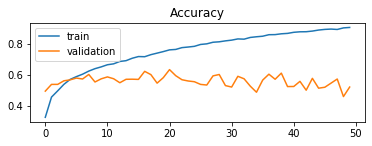

In [0]:
plt.show()
pyplot.subplot(211)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='validation')
pyplot.legend()

ploting results of accuracy of training and validation set

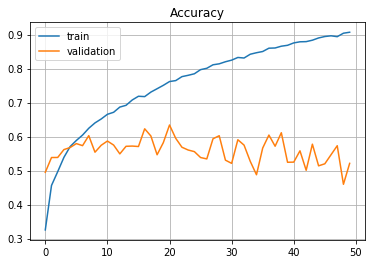

In [0]:
import numpy as np
import matplotlib.pyplot as plt

pyplot.grid(211)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='validation')
pyplot.legend()

ploting results of sensitivity of training and validation set

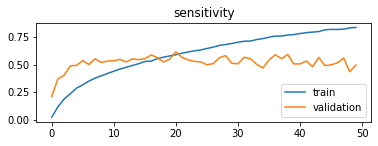

In [0]:
plt.show()
pyplot.subplot(211)
pyplot.title('sensitivity')
pyplot.plot(history.history['sensitivity'], label='train')
pyplot.plot(history.history['val_sensitivity'], label='validation')
pyplot.legend()

ploting results of specificity of training and validation set

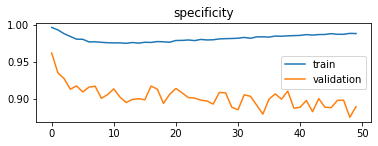

In [0]:
plt.show()
pyplot.subplot(211)
pyplot.title('specificity')
pyplot.plot(history.history['specificity'], label='train')
pyplot.plot(history.history['val_specificity'], label='validation')
pyplot.legend()

# results evaluation of adam

Importing libraryes for results visualization

In [0]:
from matplotlib import pyplot
# generate dataset

ploting results of Los of training and validation set

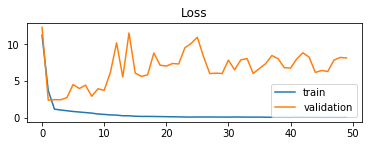

In [0]:
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history1.history['loss'], label='train')
pyplot.plot(history1.history['val_loss'], label='validation')
pyplot.legend()

ploting results of accuracy of training and validation set

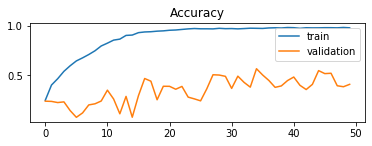

In [0]:
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history1.history['acc'], label='train')
pyplot.plot(history1.history['val_acc'], label='validation')
pyplot.legend()
pyplot.show()

ploting results of sensitivity of training and validation set

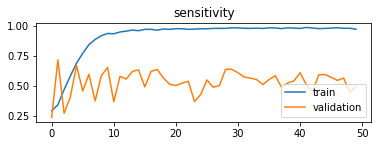

In [0]:
pyplot.subplot(212)
pyplot.title('sensitivity')
pyplot.plot(history1.history['sensitivity'], label='train')
pyplot.plot(history1.history['val_sensitivity'], label='validation')
pyplot.legend()
pyplot.show()

ploting results of specificity of training and validation set

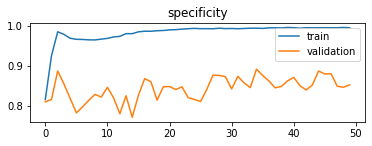

In [0]:
pyplot.subplot(212)
pyplot.title('specificity')
pyplot.plot(history1.history['specificity'], label='train')
pyplot.plot(history1.history['val_specificity'], label='validation')
pyplot.legend()
pyplot.show()

# Code for detecting external image category

If an image is given randomly to the model then the below code will tells the category of DR stage.

In [0]:
pathst = test.id_code
currt = pathst[0]
imagest = cv2.imread(f'../input/aptos2019-blindness-detection/test_images/{currt}.png')
imagest = cv2.cvtColor(imagest, colorcode)
imagest = cv2.resize(imagest,(imgsize,imgsize),
                     interpolation=interpolateVal)
imagest = imagest.reshape((1,imgsize,imgsize,3))
pathst = pathst[1:]
for patht in pathst :
    imgt = cv2.imread(f'../input/aptos2019-blindness-detection/test_images/{patht}.png')
    imgt = cv2.cvtColor(imgt, colorcode)
    imgt = cv2.resize(imgt,(imgsize,imgsize),
                      interpolation=interpolateVal)
    imgt = imgt.reshape((1,imgsize,imgsize,3))
    imagest = np.vstack((imagest,imgt))
    
imagest = imagest/255
predValTemp  = model.predict(imagest)
predVal = predValTemp.argmax(axis=-1)
test['diagnosis'] = predVal
test